# Parameters sensitivity analysis of generator model. 
Model 1 is taken for sensitivity analysis. A subjective comparison of parameter sensitivity is done using Local sensitivity anlaysis
## Author: Madhusudhan Pandey

In [4]:
using DiffEqSensitivity
using DifferentialEquations
using LinearAlgebra
using Plots
using Plots.PlotMeasures
using LaTeXStrings
pyplot();
# Linewidths and styles
LW1 = 2 
LW2 = 1.5
LS1 = :solid
LS2 = :dot
LS3 = :dashdot
LS4 = :dash;
function gen(dx,x,p,t)
    # unpacking states
    Tr = x[1]
    Ts = x[2]
    TFe = x[3]
    # upacking inputs
    Twc = p[1]
    Ifd = p[2]
    It = p[3]
    QdFes = p[4]
    Wdf = p[5]
    mdw = p[6]
    mda = p[7]
    chpa = p[8]
    chpw = p[9]
    chpCu = p[10]
    chpFe = p[11]
    
    mr = p[12]
    ms = p[13]
    mFe = p[14]
    
    UAr2d = p[15]
    UAs2Fe = p[16]
    UAFe2a = p[17]
    hAax = p[18]
    hAwx = p[19]
    
    Rr = p[20]
    Rs = p[21]
    
    UAx = 1/(1/hAax+1/hAwx)
    Qdfs = 0.8*Wdf
    # Stanton numbers
    NSta = UAx/chpa/mda
    NStw = UAx/chpw/mdw
    NStd = NStw - NSta
    # Matrices
    M1 = diagm(0=>[mr*chpCu , ms*chpCu , mFe*chpFe])
    M2 = [-UAr2d 0. 0.; 0. -UAs2Fe UAs2Fe; 0. UAs2Fe -UAs2Fe-UAFe2a]
    M3 = [0. UAr2d 0.; 0. 0. 0.; 0. 0. UAFe2a]
    #
    N1 = [-mda*chpa mda*chpa+UAr2d 0.; 0. -mda*chpa mda*chpa+UAFe2a; NStw-NSta*exp(-NStd) 0. -NStd]
    N2 = [UAr2d 0. 0.; 0. 0. UAFe2a; 0. 0. 0.]
    #
    v = [1.1*Rr*Ifd^2, 3*Rs*It^2, QdFes]
    w = [Qdfs, 0., NSta*(1-exp(-NStd))*Twc]
    #
    z = N1\(N2*x + w)
    dxdt = M1\(M2*x+M3*z + v)
    dx[1],dx[2],dx[3]=dxdt
end
# Parameters
p = [3.8,1055.,5360.,212.,528.,53.9,49.2,1.15,4.2,0.385,0.465,9260.,6827.,71200.,2.7,20.,14.3,55.6,222.,0.16e-3,3.5e-6]
# Initial values
x0 = [94., 81., 70.]
# Time span
tspan = (0., 300*60.)
# Solving Model
prob = ODELocalSensitivityProblem(gen,x0,tspan,p)
sol = solve(prob,DP8())
x,dp = extract_local_sensitivities(sol)
dTwc,dIfd,dIt,dQdFes,dWdf,dmdw,dmda,dchpa,dchpw,dchpCu,dchpFe,dmr,dms,dmFe,dUAr2d,dUAs2Fe,dUAFe2a,dhAax,dhAwx,dRr,dRs=dp;

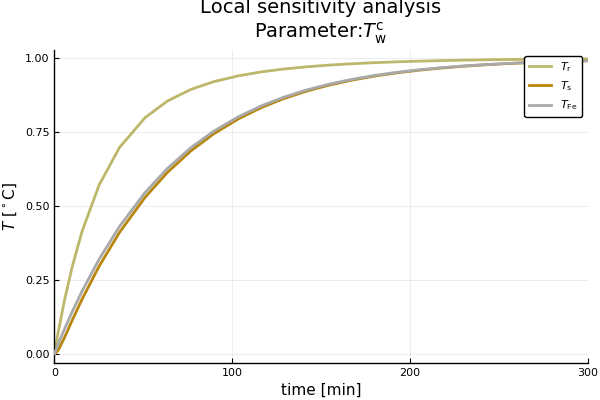

In [5]:
# Due to Twc
dTwc=dTwc'
dTwcTr, dTwcTs, dTwcTFe=dTwc[:,1],dTwc[:,2],dTwc[:,3]
plot(sol.t/60,dTwcTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dTwcTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dTwcTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotTwc=plot!(title=string("Local sensitivity analysis\nParameter:", "\$T_\\mathrm{w}^\\mathrm{c}\$") ,legend=:topright)

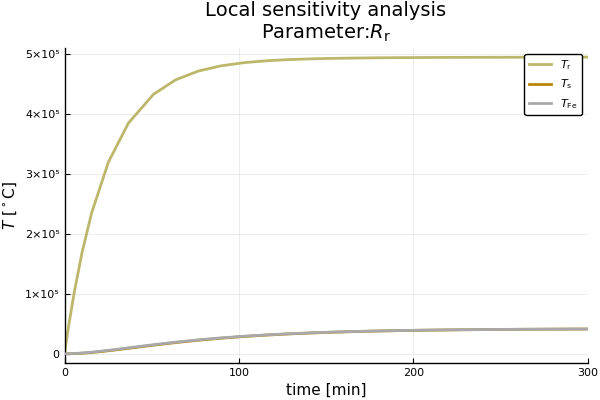

In [6]:
# Due to Rr
dRr=dRr'
dRrTr, dRrTs, dRrTFe=dRr[:,1],dRr[:,2],dRr[:,3]
plot(sol.t/60,dRrTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dRrTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dRrTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotRr=plot!(title=string("Local sensitivity analysis\nParameter:", "\$R_\\mathrm{r}\$") ,legend=:topright)

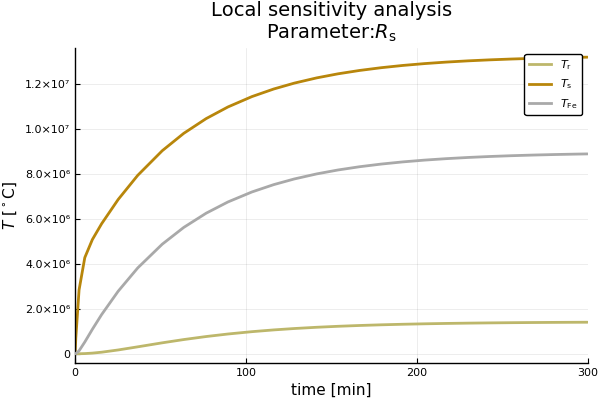

In [7]:
# Due to Rs
dRs=dRs'
dRsTr, dRsTs, dRsTFe=dRs[:,1],dRs[:,2],dRs[:,3]
plot(sol.t/60,dRsTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dRsTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dRsTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotRs=plot!(title=string("Local sensitivity analysis\nParameter:", "\$R_\\mathrm{s}\$") ,legend=:topright)


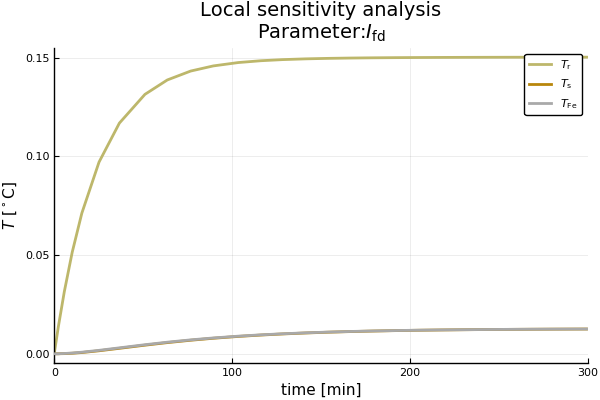

In [8]:
# Due to Ifd
dIfd=dIfd'
dIfdTr, dIfdTs, dIfdTFe=dIfd[:,1],dIfd[:,2],dIfd[:,3]
plot(sol.t/60,dIfdTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dIfdTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dIfdTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotIfd=plot!(title=string("Local sensitivity analysis\nParameter:", "\$I_\\mathrm{fd}\$") ,legend=:topright)


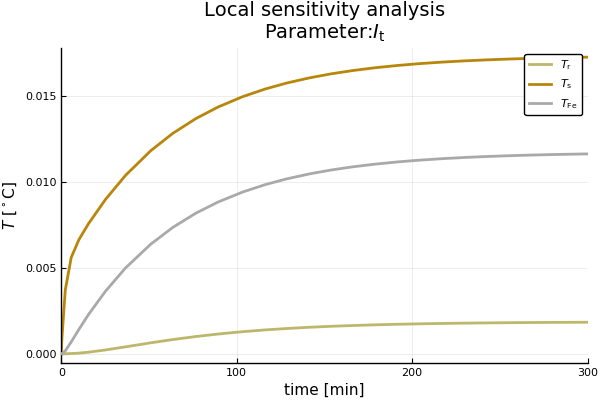

In [9]:
# Due to It
dIt=dIt'
dItTr, dItTs, dItTFe=dIt[:,1],dIt[:,2],dIt[:,3]
plot(sol.t/60,dItTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dItTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dItTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotIt=plot!(title=string("Local sensitivity analysis\nParameter:", "\$I_\\mathrm{t}\$") ,legend=:topright)


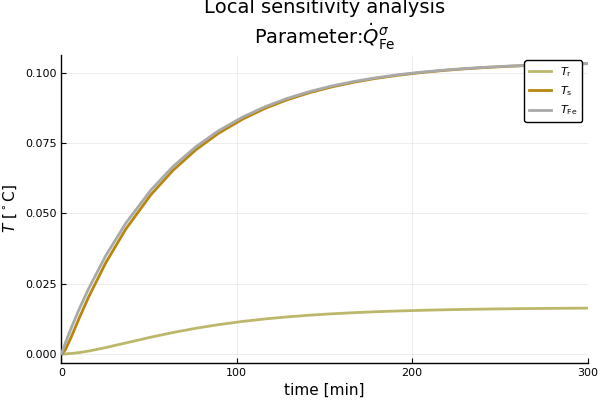

In [10]:
# Due to QdFes
dQdFes=dQdFes'
dQdFesTr, dQdFesTs, dQdFesTFe=dQdFes[:,1],dQdFes[:,2],dQdFes[:,3]
plot(sol.t/60,dQdFesTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dQdFesTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dQdFesTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotQdFes=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\dotQ_\\mathrm{Fe}^\\sigma\$") ,legend=:topright)

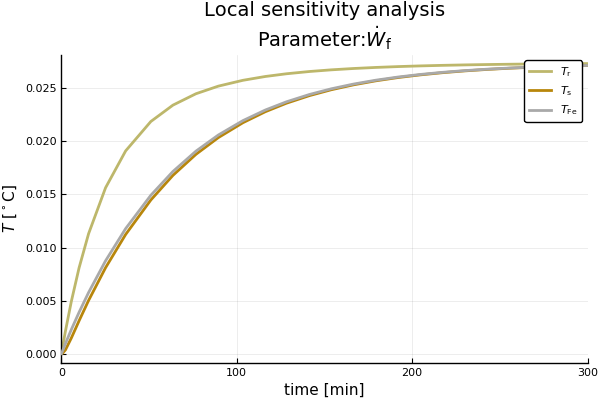

In [11]:
# Due to Wdf
dWdf=dWdf'
dWdfTr, dWdfTs, dWdfTFe=dWdf[:,1],dWdf[:,2],dWdf[:,3]
plot(sol.t/60,dWdfTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dWdfTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dWdfTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotWdf=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\dotW_\\mathrm{f}\$") ,legend=:topright)

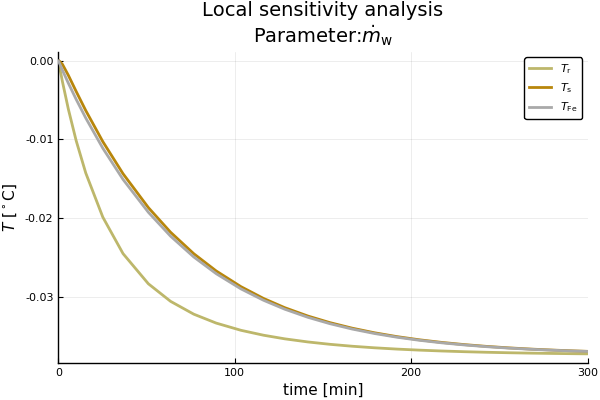

In [12]:
# Due to mdw
dmdw=dmdw'
dmdwTr, dmdwTs, dmdwTFe=dmdw[:,1],dmdw[:,2],dmdw[:,3]
plot(sol.t/60,dmdwTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmdwTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmdwTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotmdw=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\dotm_\\mathrm{w}\$") ,legend=:topright)

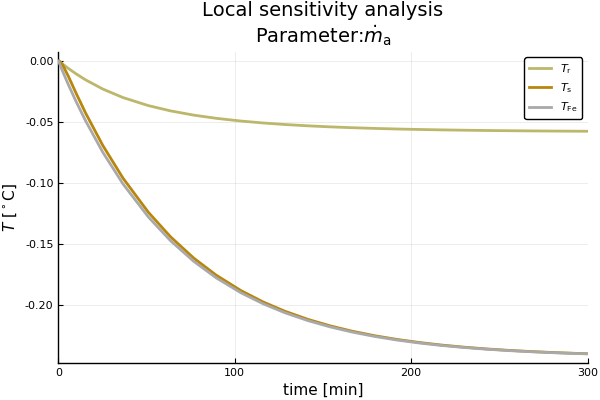

In [13]:
# Due to mda
dmda=dmda'
dmdaTr, dmdaTs, dmdaTFe=dmda[:,1],dmda[:,2],dmda[:,3]
plot(sol.t/60,dmdaTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmdaTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmdaTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotmda=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\dotm_\\mathrm{a}\$") ,legend=:topright)

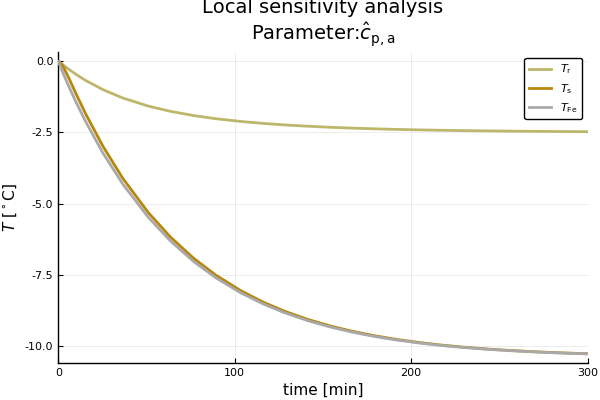

In [14]:
# Due to chpa
dchpa=dchpa'
dchpaTr, dchpaTs, dchpaTFe=dchpa[:,1],dchpa[:,2],dchpa[:,3]
plot(sol.t/60,dchpaTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dchpaTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dchpaTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotchpa=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\hatc_\\mathrm{p,a}\$") ,legend=:topright)

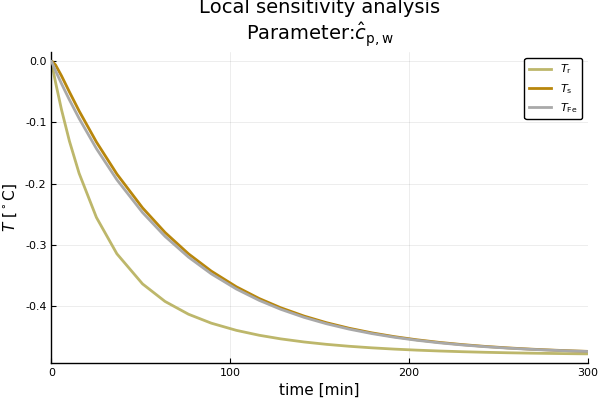

In [15]:
# Due to chpw
dchpw=dchpw'
dchpwTr, dchpwTs, dchpwTFe=dchpw[:,1],dchpw[:,2],dchpw[:,3]
plot(sol.t/60,dchpwTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dchpwTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dchpwTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotchpw=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\hatc_\\mathrm{p,w}\$") ,legend=:topright)

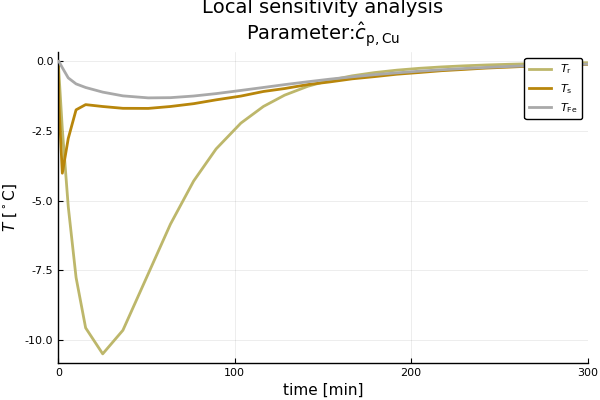

In [16]:
# Due to chpCu
dchpCu=dchpCu'
dchpCuTr, dchpCuTs, dchpCuTFe=dchpCu[:,1],dchpCu[:,2],dchpCu[:,3]
plot(sol.t/60,dchpCuTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dchpCuTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dchpCuTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotchpCu=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\hatc_\\mathrm{p,Cu}\$") ,legend=:topright)

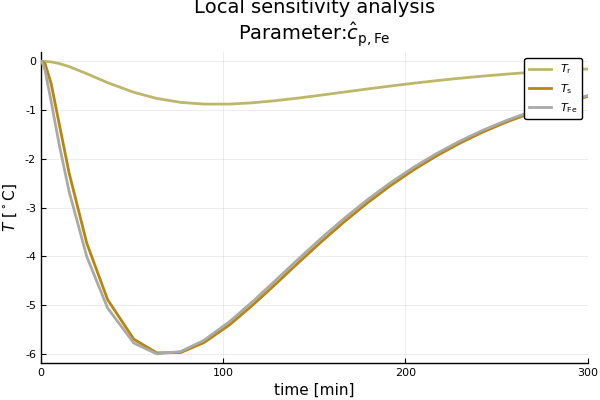

In [17]:
# Due to chpFe
dchpFe=dchpFe'
dchpFeTr, dchpFeTs, dchpFeTFe=dchpFe[:,1],dchpFe[:,2],dchpFe[:,3]
plot(sol.t/60,dchpFeTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dchpFeTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dchpFeTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotchpFe=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\hatc_\\mathrm{p,Fe}\$") ,legend=:topright)

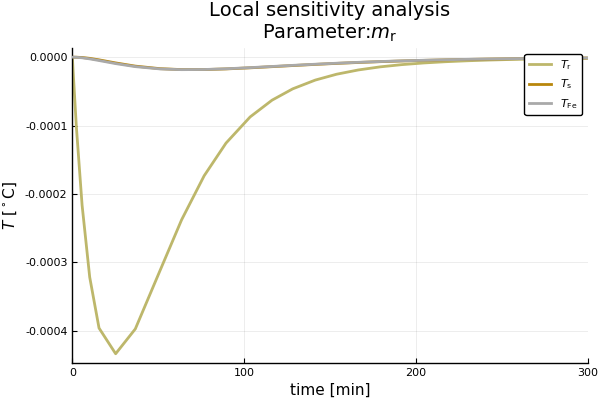

In [29]:
# Due to mr
dmr=dmr'
dmrTr, dmrTs, dmrTFe=dmr[:,1],dmr[:,2],dmr[:,3]
plot(sol.t/60,dmrTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmrTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmrTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotmr=plot!(title=string("Local sensitivity analysis\nParameter:", "\$m_\\mathrm{r}\$") ,legend=:topright)

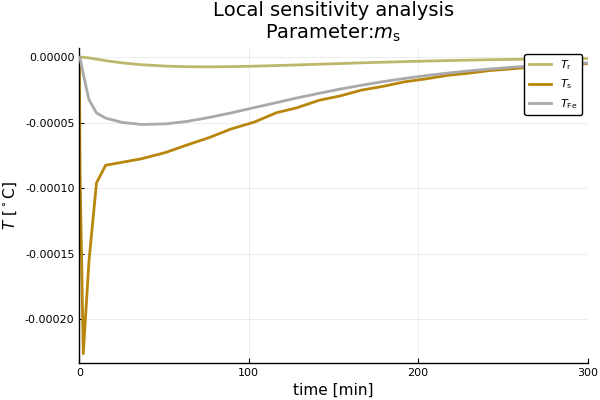

In [18]:
# Due to ms
dms=dms'
dmsTr, dmsTs, dmsTFe=dms[:,1],dms[:,2],dms[:,3]
plot(sol.t/60,dmsTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmsTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmsTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotms=plot!(title=string("Local sensitivity analysis\nParameter:", "\$m_\\mathrm{s}\$") ,legend=:topright)

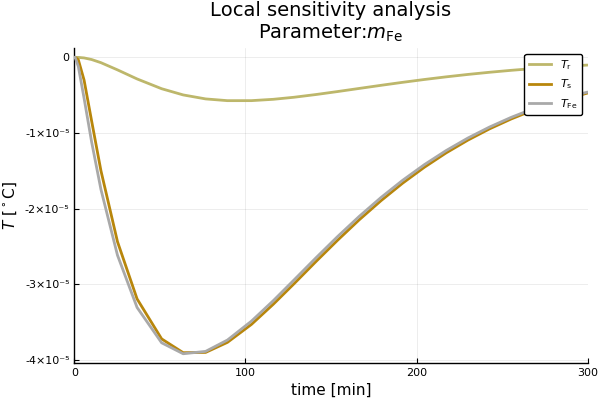

In [19]:
# Due to mFe
dmFe=dmFe'
dmFeTr, dmFeTs, dmFeTFe=dmFe[:,1],dmFe[:,2],dmFe[:,3]
plot(sol.t/60,dmFeTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dmFeTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dmFeTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotmFe=plot!(title=string("Local sensitivity analysis\nParameter:", "\$m_\\mathrm{Fe}\$") ,legend=:topright)

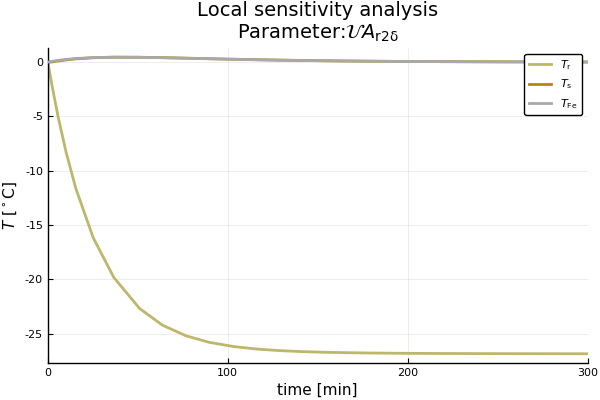

In [20]:
# Due to UAr2d
dUAr2d=dUAr2d'
dUAr2dTr, dUAr2dTs, dUAr2dTFe=dUAr2d[:,1],dUAr2d[:,2],dUAr2d[:,3]
plot(sol.t/60,dUAr2dTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dUAr2dTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dUAr2dTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotUAr2d=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{U}A_\\mathrm{r2\\delta}\$") ,legend=:topright)

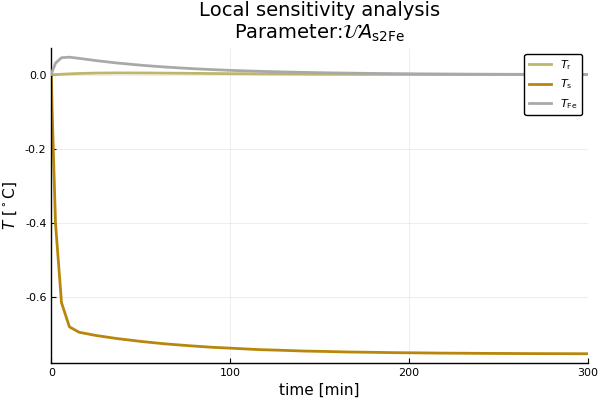

In [21]:
# Due to UAs2Fe
dUAs2Fe=dUAs2Fe'
dUAs2FeTr, dUAs2FeTs, dUAs2FeTFe=dUAs2Fe[:,1],dUAs2Fe[:,2],dUAs2Fe[:,3]
plot(sol.t/60,dUAs2FeTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dUAs2FeTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dUAs2FeTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotUAs2Fe=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{U}A_\\mathrm{s2Fe}\$") ,legend=:topright)

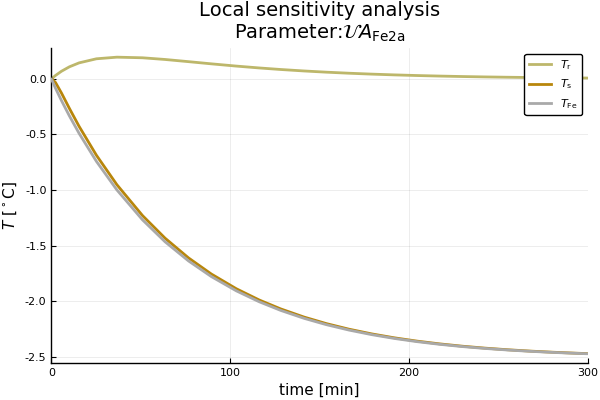

In [22]:
# Due to UAFe2a
dUAFe2a=dUAFe2a'
dUAFe2aTr, dUAFe2aTs, dUAFe2aTFe=dUAFe2a[:,1],dUAFe2a[:,2],dUAFe2a[:,3]
plot(sol.t/60,dUAFe2aTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dUAFe2aTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dUAFe2aTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plotUAFe2a=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{U}A_\\mathrm{Fe2a}\$") ,legend=:topright)

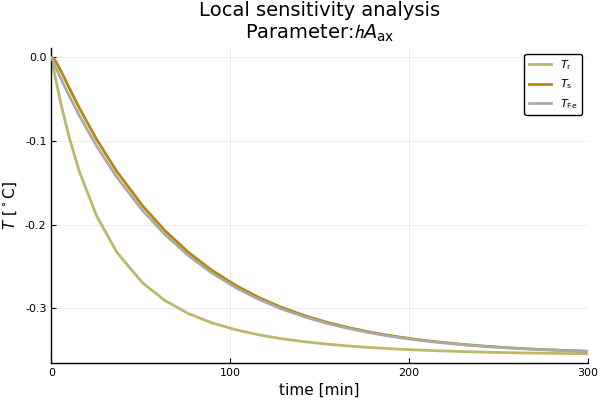

In [23]:
# Due to hAax
dhAax=dhAax'
dhAaxTr, dhAaxTs, dhAaxTFe=dhAax[:,1],dhAax[:,2],dhAax[:,3]
plot(sol.t/60,dhAaxTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dhAaxTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dhAaxTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plothAax=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{h}A_\\mathrm{ax}\$") ,legend=:topright)

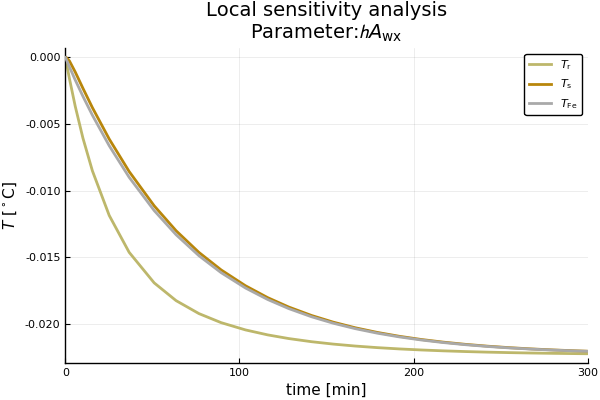

In [24]:
# Due to hAwx
dhAwx=dhAwx'
dhAwxTr, dhAwxTs, dhAwxTFe=dhAwx[:,1],dhAwx[:,2],dhAwx[:,3]
plot(sol.t/60,dhAwxTr,lc=:darkkhaki ,lw=LW1,ls=LS1,label=L"$T_\mathrm{r}$")
plot!(sol.t/60,dhAwxTs,lc=:darkgoldenrod ,lw=LW1,label=L"$T_\mathrm{s}$")
plot!(sol.t/60,dhAwxTFe,lc=:darkgrey ,lw=LW1,label=L"$T_\mathrm{Fe}$")
plot!(xlabel="time [min]",ylabel=L"$T$ [${}^\circ$C]" )
plot!(xlim=(0,300))
plothAwx=plot!(title=string("Local sensitivity analysis\nParameter:", "\$\\mathcal{h}A_\\mathrm{wx}\$") ,legend=:topright)

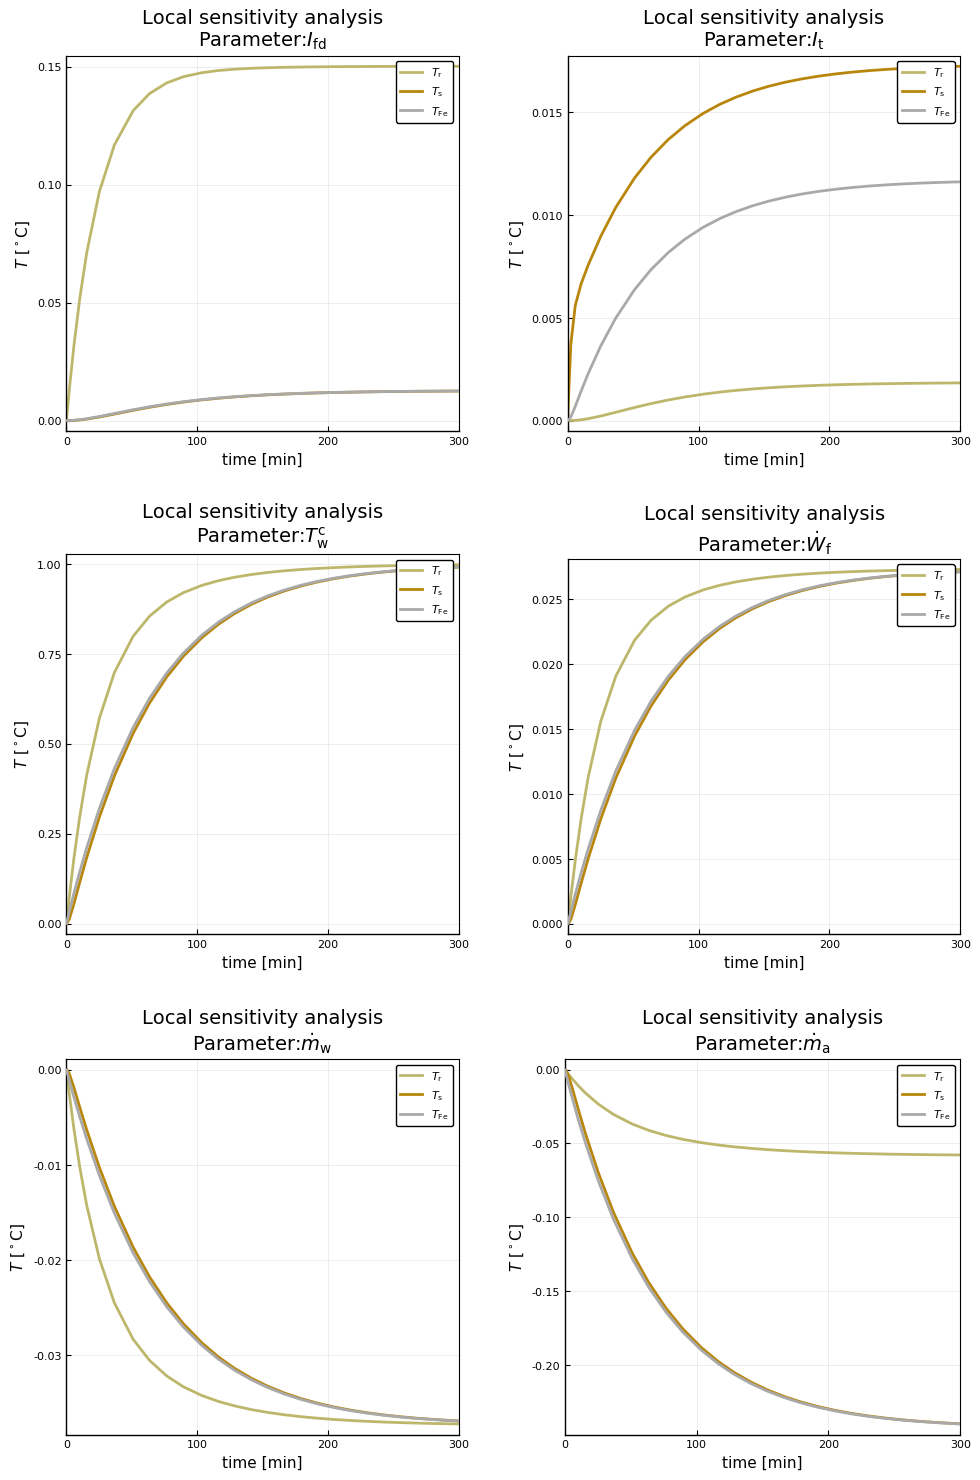

In [26]:
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter5/";

plot(plotIfd,plotIt,plotTwc,plotWdf,plotmdw,plotmda,
    layout=grid(3,2),size = (1000, 1500),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm)
figfile="InputsLocalSensitivity.svg"
savefig(figpath*figfile)

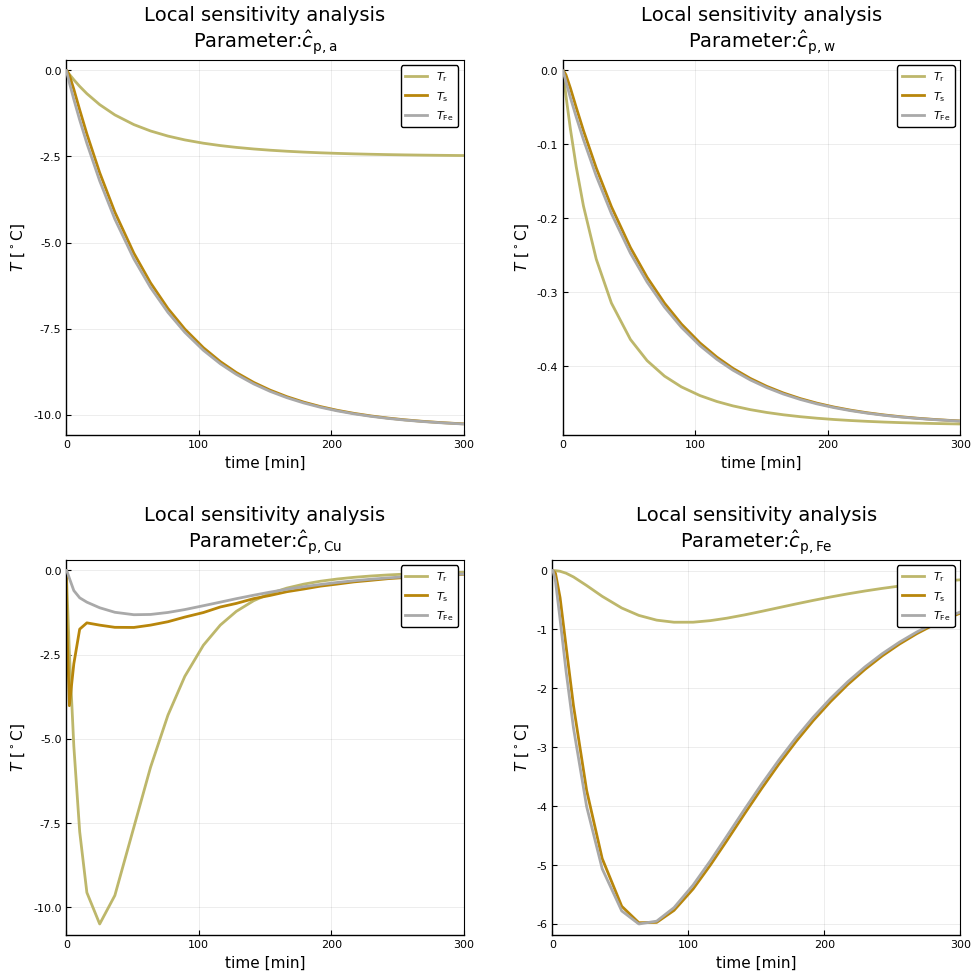

In [27]:
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter5/";

plot(plotchpa,plotchpw,plotchpCu,plotchpFe,
    layout=grid(2,2),size = (1000, 1000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm)
figfile="SpecificheatLocalSensitivity.svg"
savefig(figpath*figfile)

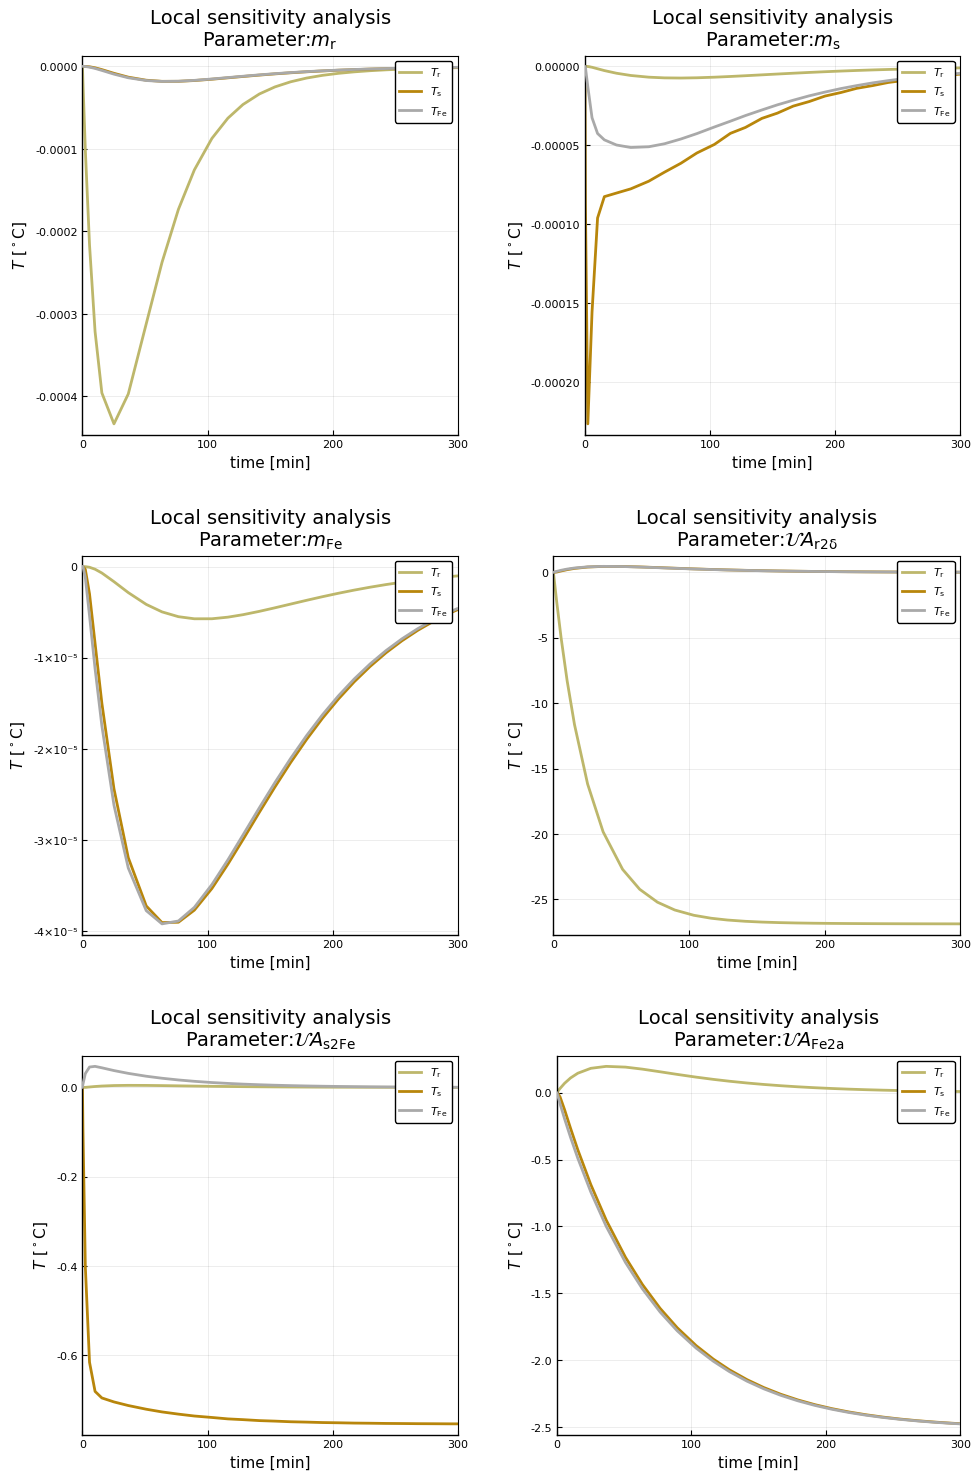

In [30]:
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter5/";

plot(plotmr,plotms,plotmFe,plotUAr2d,plotUAs2Fe,plotUAFe2a,
    layout=grid(3,2),size = (1000, 1500),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm)
figfile="MassAndHeatTransferLocalSensitivity.svg"
savefig(figpath*figfile)

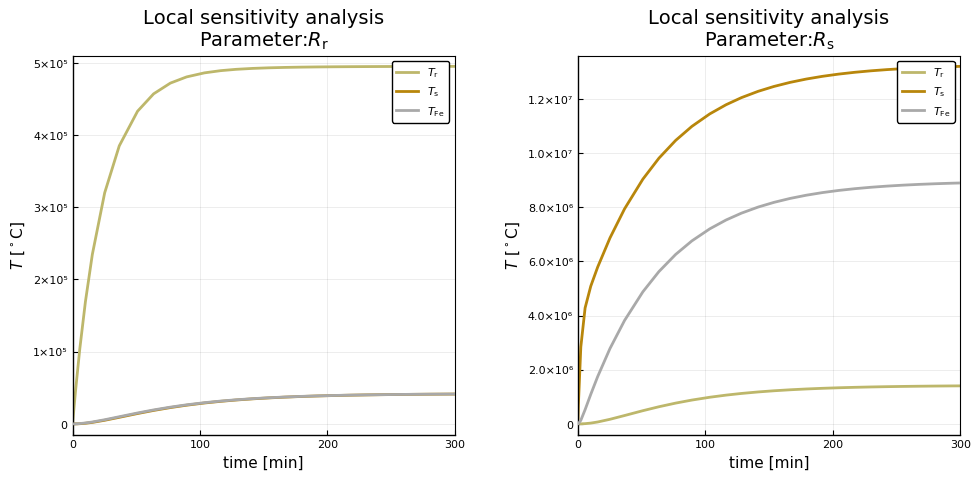

In [33]:
figpath = "C:/Users/pande/Desktop/Desktop/Thesis/ThesisLyx/figures/chapter5/";

plot(plotRr,plotRs,
    layout=grid(1,2),size = (1000, 500),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm)
figfile="ResistancesLocalSensitivity.svg"
savefig(figpath*figfile)

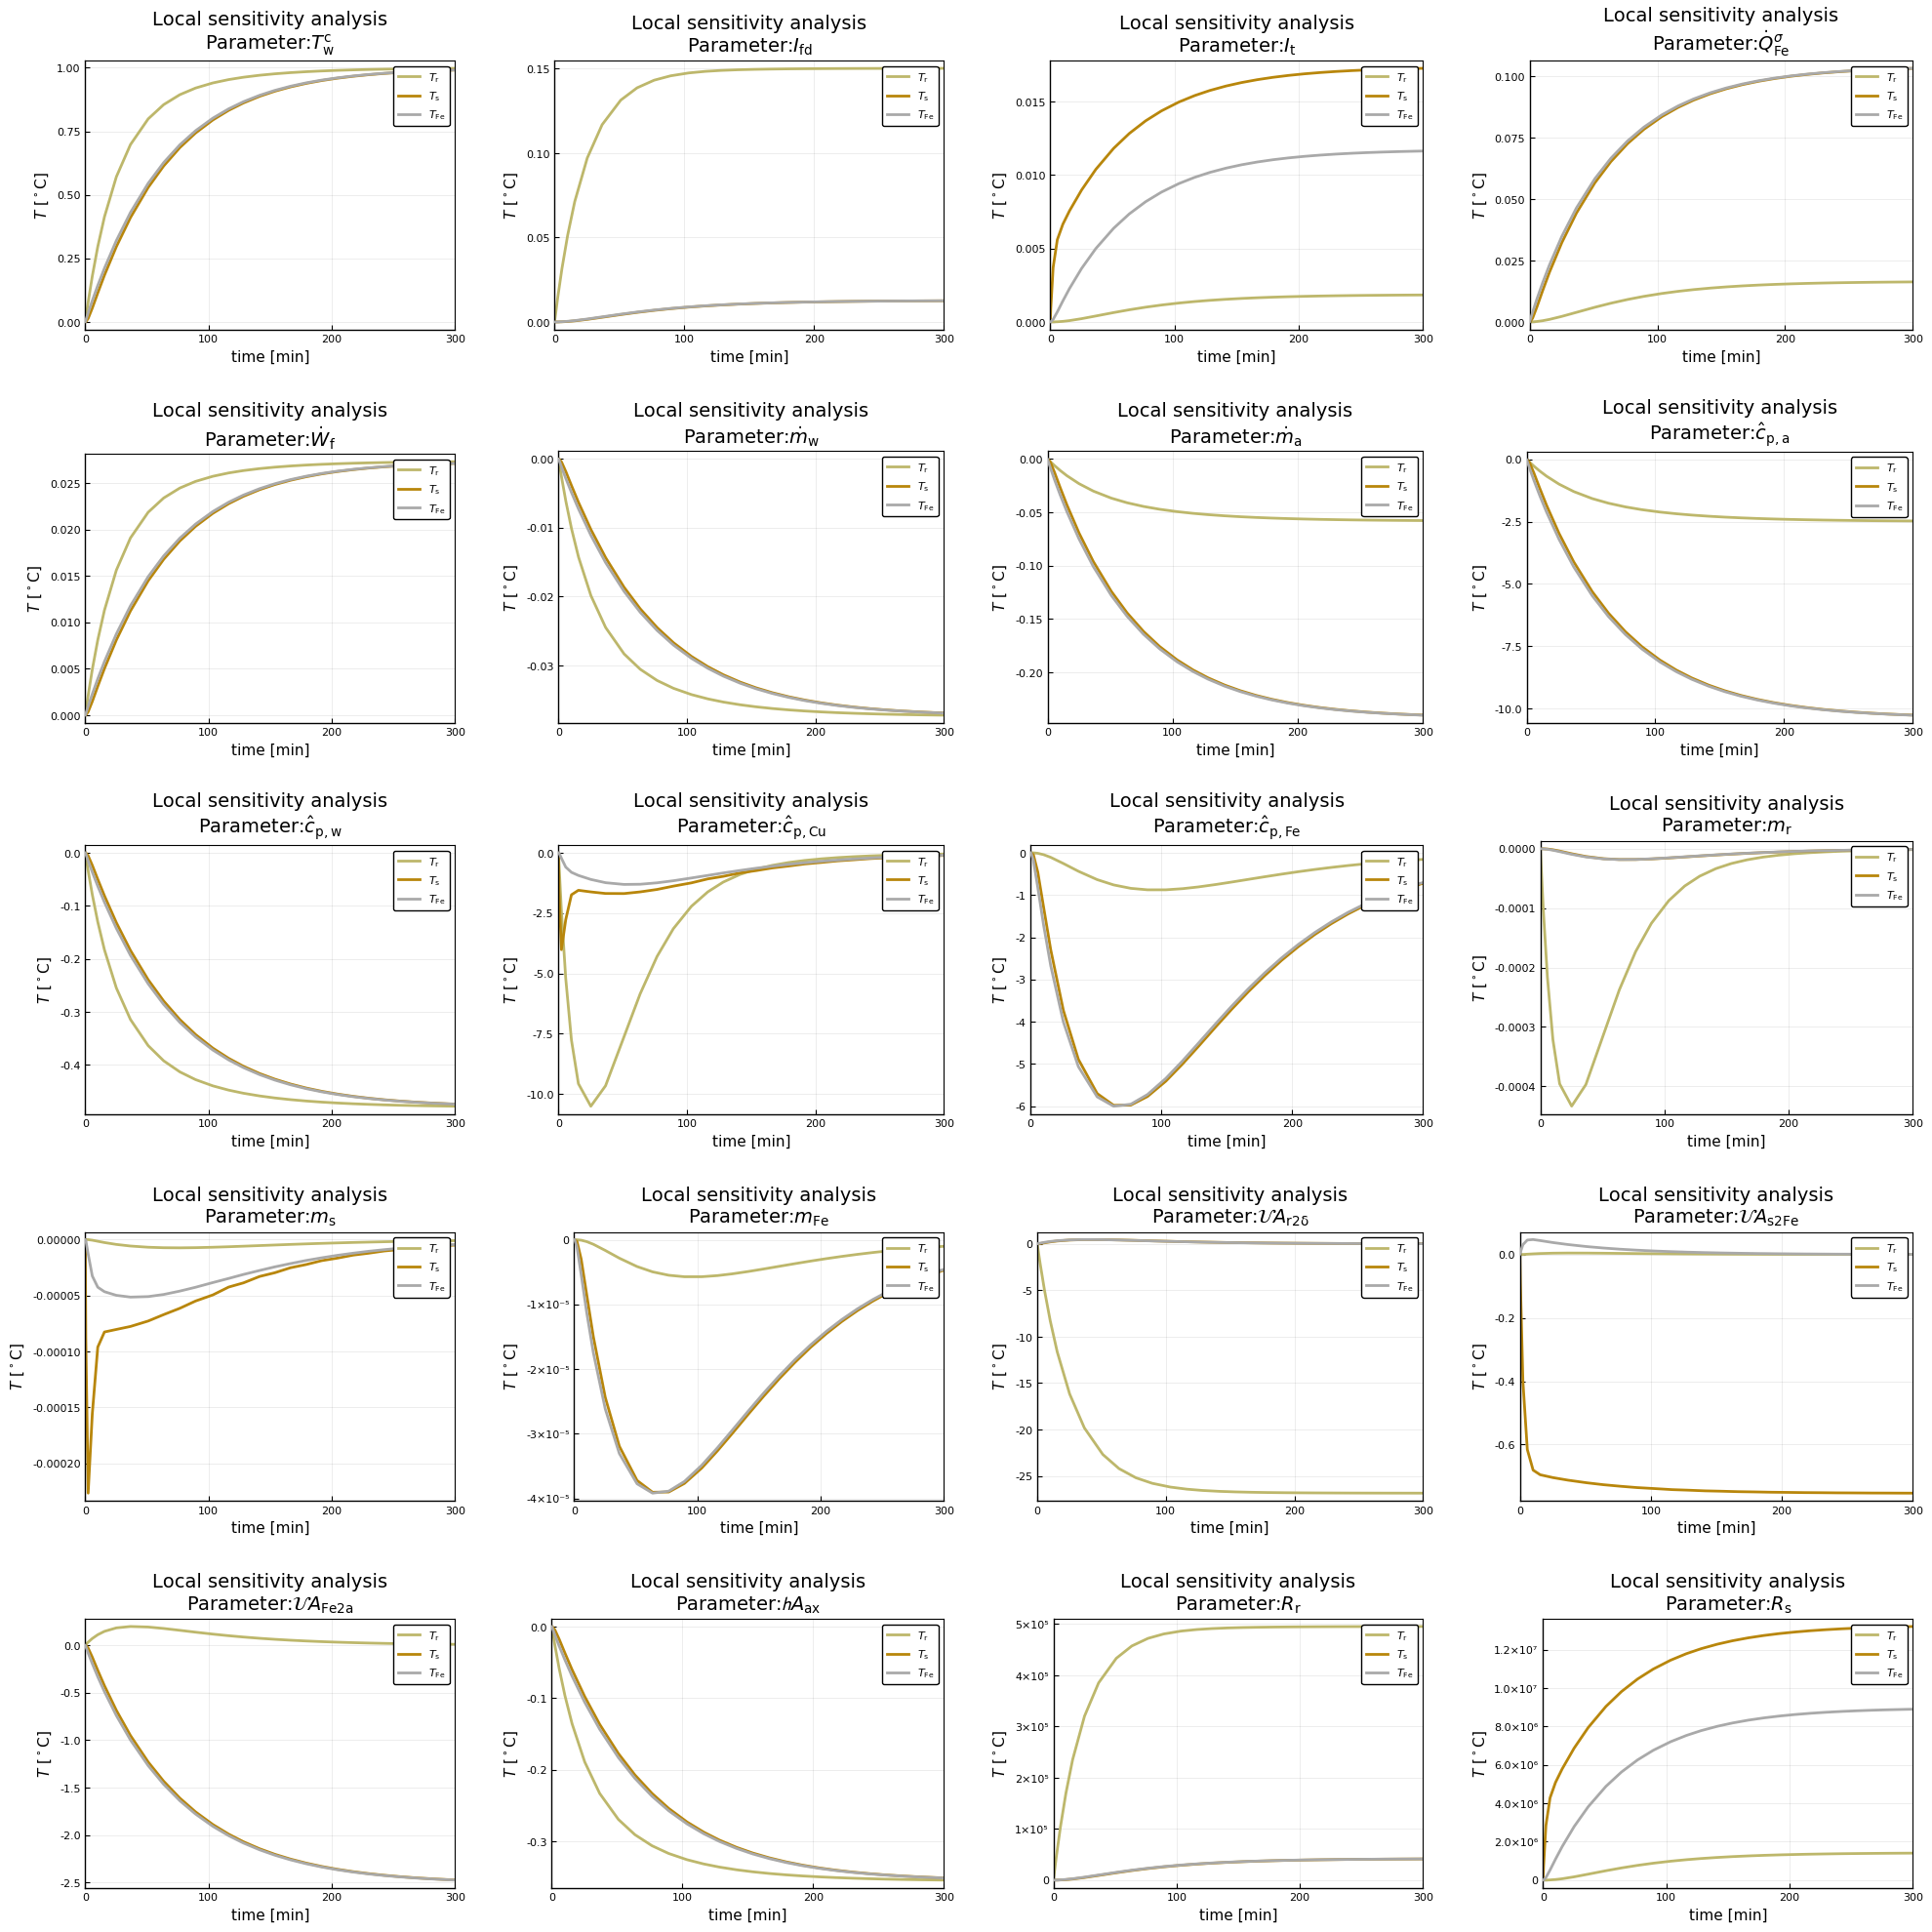

In [107]:
plot(plotTwc,plotIfd,plotIt,plotQdFes,plotWdf,plotmdw,plotmda,plotchpa,plotchpw,plotchpCu,plotchpFe,plotmr,plotms,plotmFe,plotUAr2d,plotUAs2Fe,plotUAFe2a,plothAax,plotRr,plotRs,
        layout=grid(5,4),size = (2000, 2000),framestyle = :box,
        bottom_margin=10mm,right_margin=10mm)# Due to It
figfile="LocalSensitivity.svg"
savefig(figpath*figfile)